In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Data scription:
- COUNTYFP: The county FIPS code.
- NEVER: The estimated share of people in this county who would say never in response to the question “How often 
  do you wear a mask in public when you expect to be within six feet of another person?”
- RARELY: The estimated share of people in this county who would say rarely
- SOMETIMES: The estimated share of people in this county who would say sometimes
- FREQUENTLY: The estimated share of people in this county who would say frequently
- ALWAYS: The estimated share of people in this county who would say always

In [2]:
df = pd.read_csv('mask_use_by_county.csv', index_col=0)
df.head()

,county_fips_code,never,rarely,sometimes,frequently,always
0,15007,0.0,0.021,0.046,0.108,0.825
1,36011,0.0,0.033,0.072,0.162,0.732
2,48209,0.0,0.007,0.022,0.115,0.855
3,51740,0.0,0.019,0.122,0.225,0.634
4,17019,0.0,0.067,0.080,0.192,0.661


In [3]:
df.isnull().sum()

county_fips_code    0
never               0
rarely              0
sometimes           0
frequently          0
always              0
dtype: int64

In [4]:
df.sort_values(by=['county_fips_code'], inplace=True)

In [5]:
df.drop(df[df['county_fips_code'] < 36001].index,inplace=True)
df.drop(df[df['county_fips_code'] > 36123].index,inplace=True)
df = df.reset_index(drop=True)

In [6]:
df['county_name'] = ['Albany','Allegany','Bronx','Broome','Cattaraugus','Cayuga','Chautauqua','Chemung',
                     'Chenango','Clinton','Columbia','Cortland','Delaware','Dutchess','Erie','Essex',
                     'Franklin','Fulton','Genesee','Greene','Hamilton','Herkimer','Jefferson','Kings',
                     'Lewis','Livingston','Madison','Monroe','Montgomery','Nassau','New York','Niagara',
                     'Oneida','Onondaga','Ontario','Orange','Orleans','Oswego','Otsego','Putnam','Queens',
                     'Rensselaer','Richmond','Rockland','Saratoga','Schenectady','Schoharie','Schuyler',
                     'Seneca','St.Lawrence','Steuben','Suffolk','Sullivan','Tioga','Tompkins','Ulster',
                     'Warren','Washington','Wayne','Westchester','Wyoming','Yates']

In [7]:
col_name = 'county_name'
second_col = df.pop(col_name)
df.insert(1, col_name, second_col)

In [9]:
df.head()

,county_fips_code,county_name,never,rarely,sometimes,frequently,always
0,36001,Albany,0.006,0.012,0.052,0.142,0.788
1,36003,Allegany,0.062,0.015,0.028,0.124,0.771
2,36005,Bronx,0.043,0.013,0.066,0.136,0.742
3,36007,Broome,0.044,0.028,0.051,0.066,0.812
4,36009,Cattaraugus,0.015,0.013,0.024,0.156,0.793


In [ ]:
df.to_csv('mask_clean.csv', index=False)

## Different Masks Use Status for Per County In NY State 

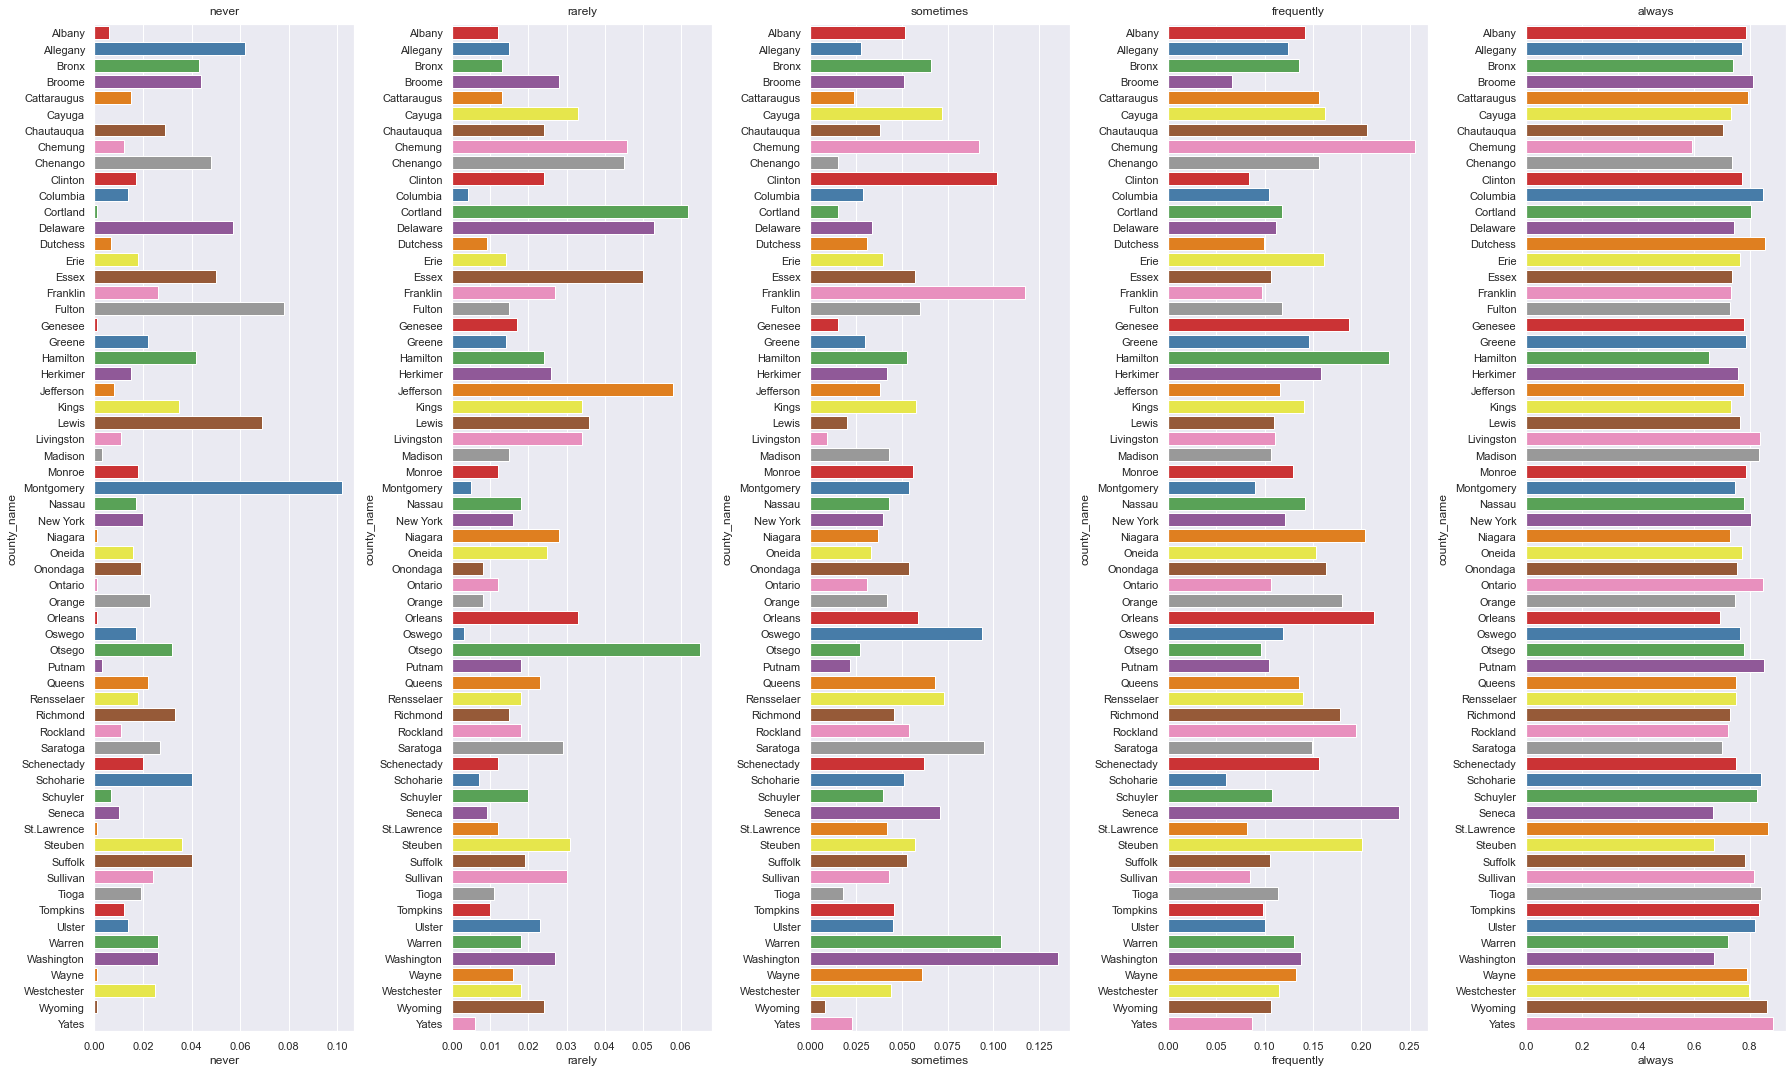

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))

plt.subplot(1, 5, 1)
sns.barplot(x='never', y='county_name', data=df, palette='Set1')
plt.title('never', fontsize=12, pad=10)

plt.subplot(1, 5, 2)
sns.barplot(x='rarely', y='county_name', data=df, palette='Set1')
plt.title('rarely', fontsize=12, pad=10)

plt.subplot(1, 5, 3)
sns.barplot(x='sometimes', y='county_name', data=df, palette='Set1')
plt.title('sometimes', fontsize=12, pad=10)

plt.subplot(1, 5, 4)
sns.barplot(x='frequently', y='county_name', data=df, palette='Set1')
plt.title('frequently', fontsize=12, pad=10)

plt.subplot(1, 5, 5)
sns.barplot(x='always', y='county_name', data=df, palette='Set1')
plt.title('always', fontsize=12, pad=10)
plt.tight_layout();

In [11]:
df[df['never']==df['never'].max()][['county_name','never']]

,county_name,never
28,Montgomery,0.102


In [12]:
df[df['never']==df['never'].min()][['county_name','never']]

,county_name,never
5,Cayuga,0.0
61,Yates,0.0


In [13]:
df[df['rarely'] == df['rarely'].max()][['county_name','rarely']]

,county_name,rarely
38,Otsego,0.065


In [14]:
df[df['rarely'] == df['rarely'].min()][['county_name','rarely']]

,county_name,rarely
37,Oswego,0.003


In [15]:
df[df['sometimes'] == df['sometimes'].max()][['county_name','sometimes']]

,county_name,sometimes
57,Washington,0.135


In [16]:
df[df['sometimes'] == df['sometimes'].min()][['county_name','sometimes']]

,county_name,sometimes
60,Wyoming,0.008


In [17]:
df[df['frequently'] == df['frequently'].max()][['county_name','frequently']]

,county_name,frequently
7,Chemung,0.256


In [18]:
df[df['sometimes'] == df['sometimes'].min()][['county_name','frequently']]

,county_name,frequently
60,Wyoming,0.107


In [19]:
df[df['always'] == df['always'].max()][['county_name','always']]

,county_name,always
61,Yates,0.884


In [20]:
df[df['always'] == df['always'].min()][['county_name','always']]

,county_name,always
7,Chemung,0.594


**FOUND:**

    - The most never wareing mask people are living in Montgomery in New York State
    - In Chemung, people prefer to frequntly ware mask but not always
    - In Wyoming, least people ware mask sometimes and frequently

## Overall Distribution for NY State

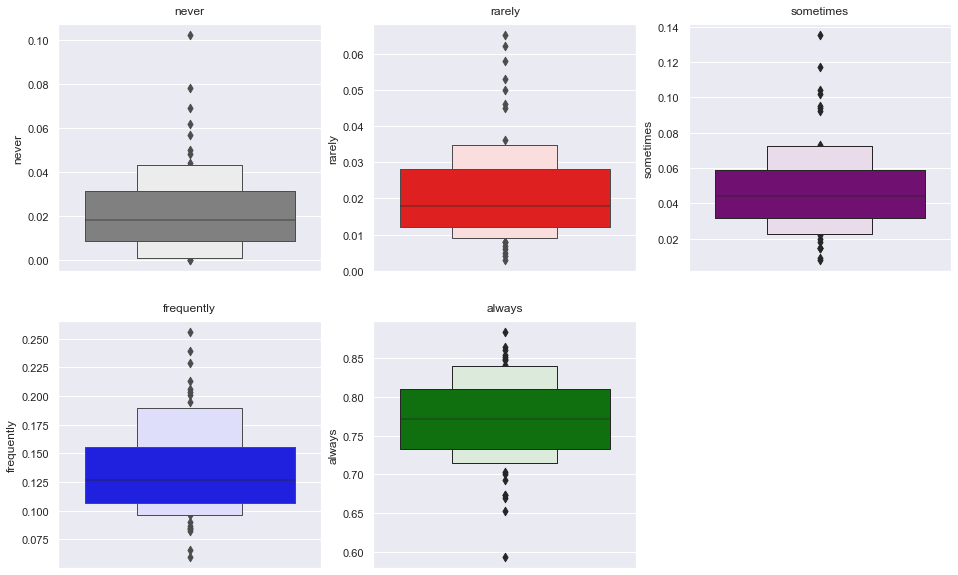

In [21]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxenplot(y='never', data=df, color='grey')
plt.title('never', fontsize=12, pad=10)

plt.subplot(2, 3, 2)
sns.boxenplot(y='rarely', data=df, color='red')
plt.title('rarely', fontsize=12, pad=10)

plt.subplot(2, 3, 3)
sns.boxenplot(y='sometimes', data=df, color='purple')
plt.title('sometimes', fontsize=12, pad=10)

plt.subplot(2, 3, 4)
sns.boxenplot(y='frequently', data=df, color='blue')
plt.title('frequently', fontsize=12, pad=10)

plt.subplot(2, 3, 5)
sns.boxenplot(y='always', data=df, color='green')
plt.title('always', fontsize=12, pad=10);

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

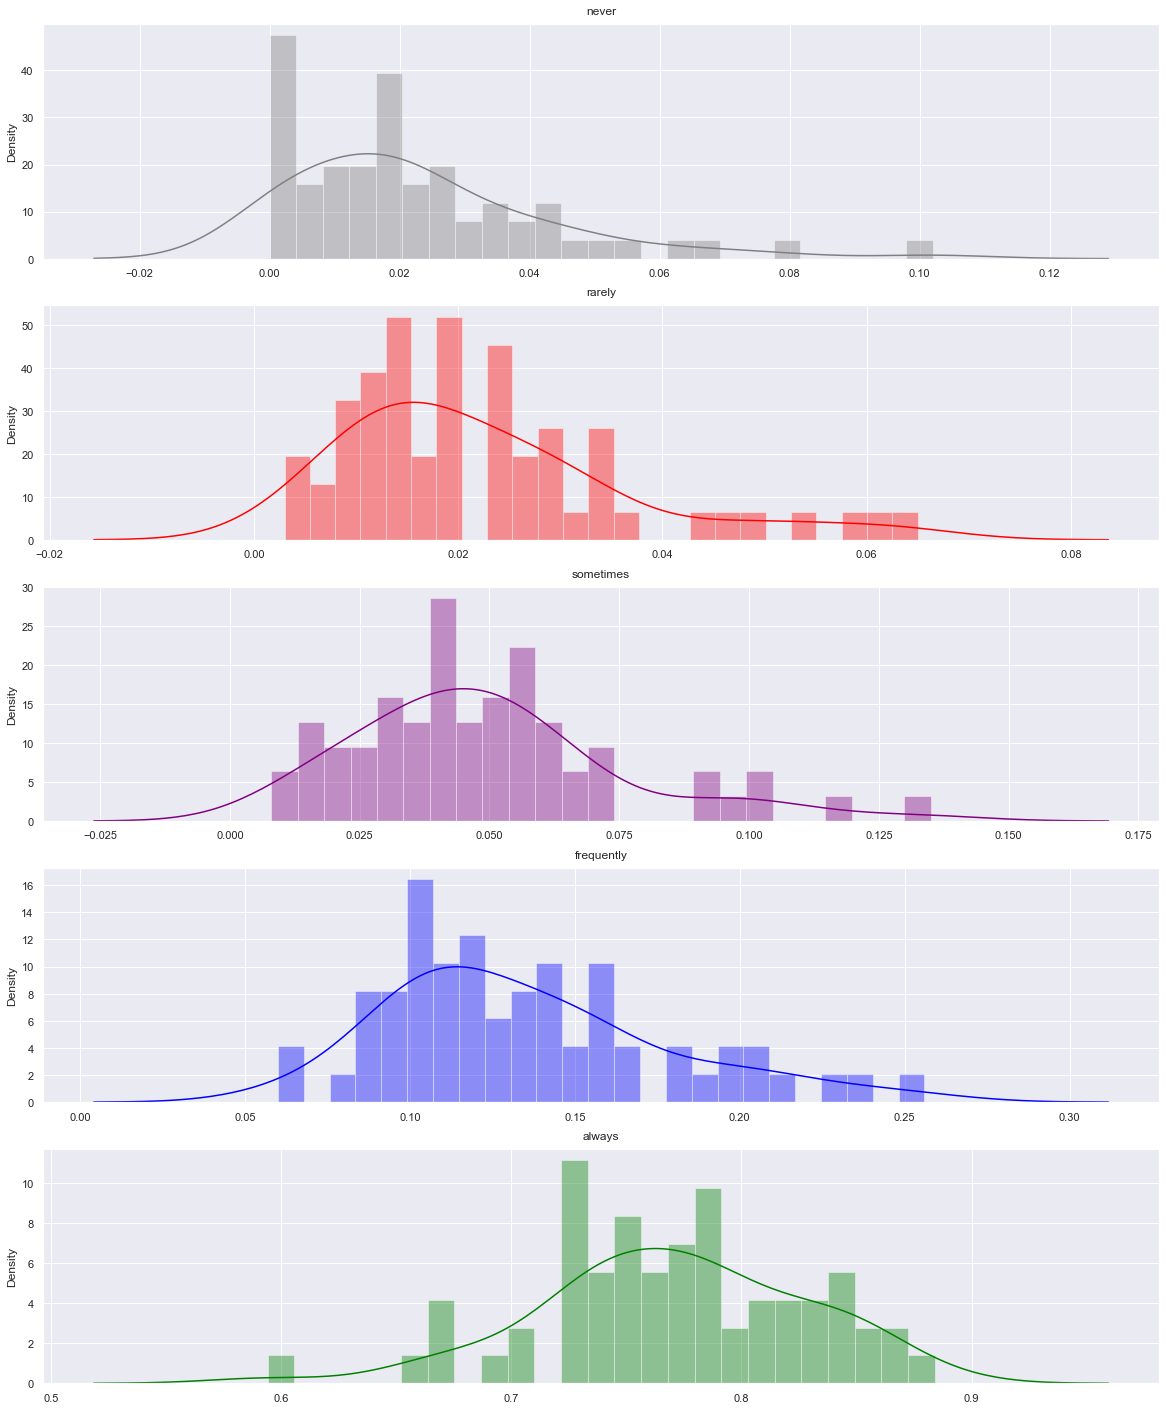

In [22]:
fig, ax = plt.subplots(figsize=(20, 25))

plt.subplot(5, 1, 1)
sns.distplot(x=df['never'], bins=25, color='grey')
plt.title('never', fontsize=12, pad=10)

plt.subplot(5, 1, 2)
sns.distplot(x=df['rarely'], bins=25, color='red')
plt.title('rarely', fontsize=12, pad=10)

plt.subplot(5, 1, 3)
sns.distplot(x=df['sometimes'], bins=25, color='purple')
plt.title('sometimes', fontsize=12, pad=10)

plt.subplot(5, 1, 4)
sns.distplot(x=df['frequently'], bins=25, color='blue')
plt.title('frequently', fontsize=12, pad=10)

plt.subplot(5, 1, 5)
sns.distplot(x=df['always'], bins=25, color='green')
plt.title('always', fontsize=12, pad=10)
plt.tight_layout;

## Breaking Down Each Part

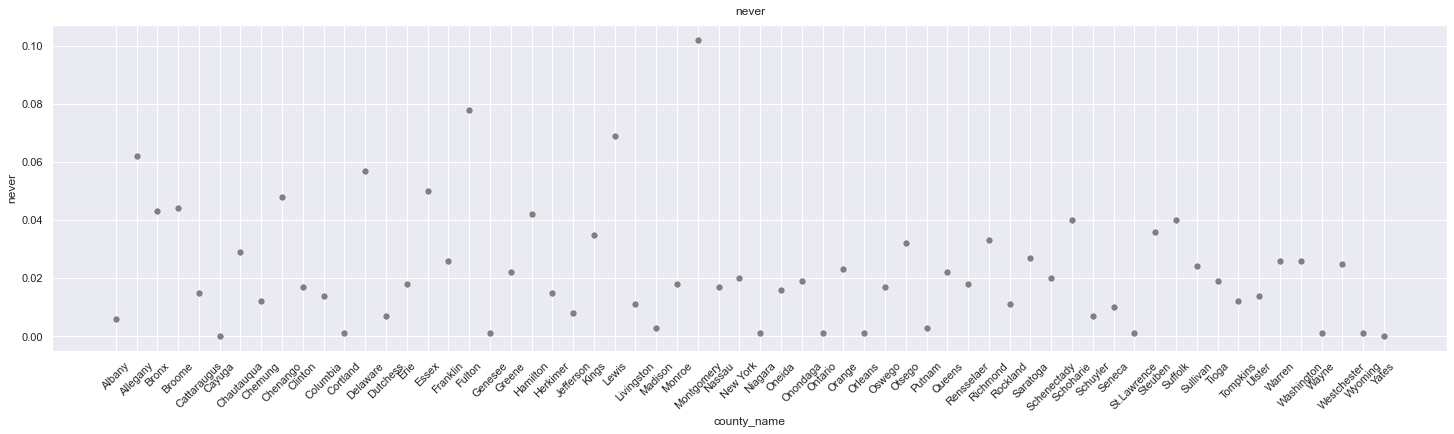

In [23]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x=df['county_name'], y=df['never'], data=df, color='grey', s=50)
plt.xticks(rotation=45)
plt.title('never', fontsize=12, pad=10);

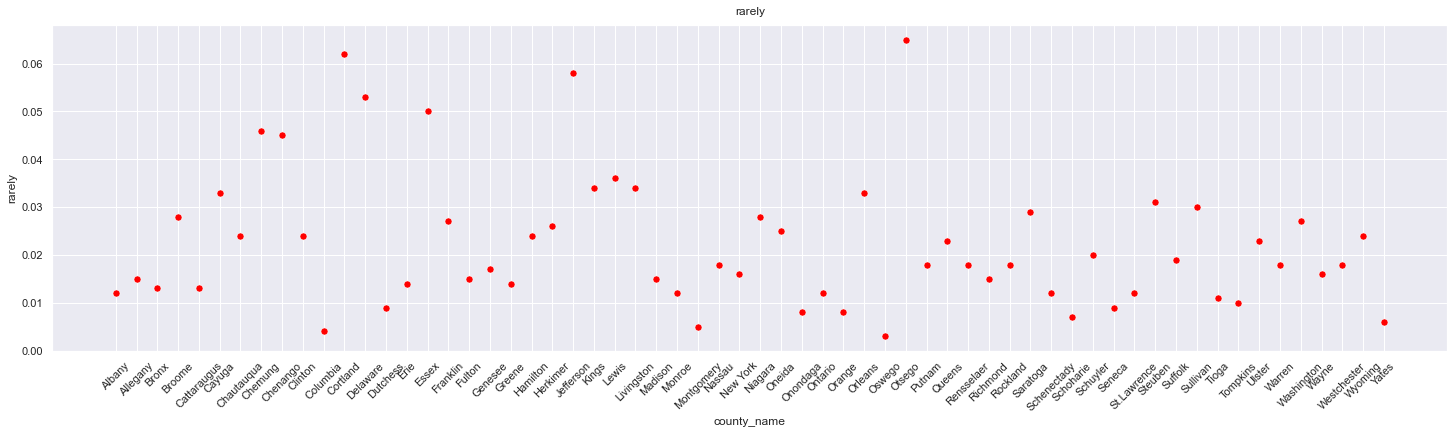

In [24]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x=df['county_name'], y=df['rarely'], data=df, color='red', s=50)
plt.xticks(rotation=45)
plt.title('rarely', fontsize=12, pad=10);

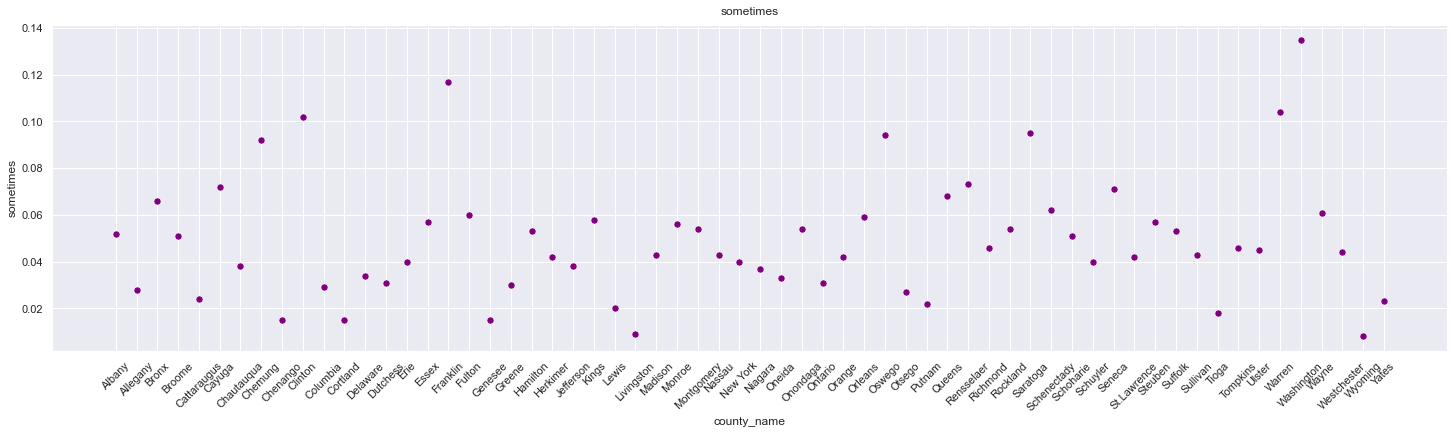

In [25]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x=df['county_name'], y=df['sometimes'], data=df, color='purple', s=50)
plt.xticks(rotation=45)
plt.title('sometimes', fontsize=12, pad=10);

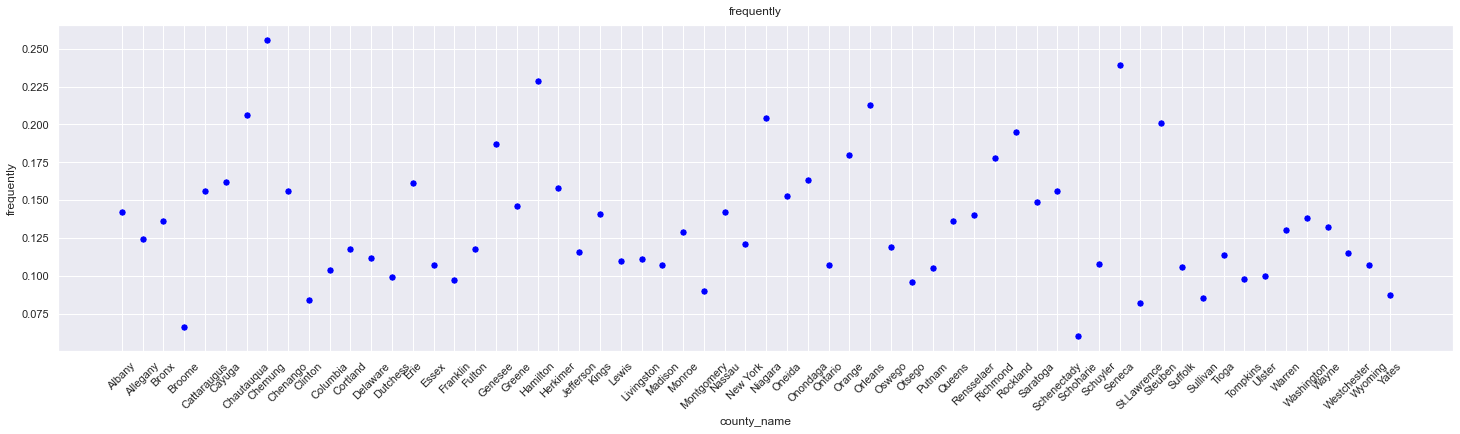

In [26]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x=df['county_name'], y=df['frequently'], data=df, color='blue', s=50)
plt.xticks(rotation=45)
plt.title('frequently', fontsize=12, pad=10);

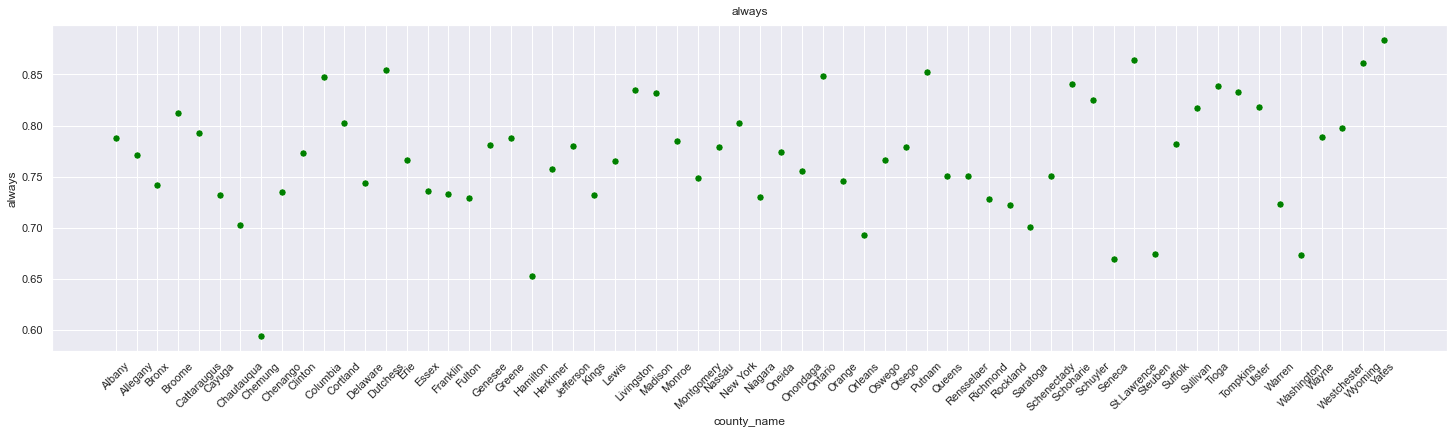

In [27]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x=df['county_name'], y=df['always'], data=df, color='green', s=50)
plt.xticks(rotation=45)
plt.title('always', fontsize=12, pad=10);

In [28]:
import plotly.express as px
import json

import plotly.io as pio
pio.renderers.default = 'chrome'

In [29]:
new_york_state = json.load(open('counties_ny.geojson', 'r'))

In [30]:
# get the counties code

state_id_map = {}
for feature in new_york_state['features']:
    feature['id'] = feature['properties']['fips']
    state_id_map[feature['properties']['county']] = feature['id']

In [31]:
new_york_state['features'][0]['properties']

{'cartodb_id': 27,
 'state_fips': '36',
 'state_name': 'New York',
 'county': 'Putnam',
 'housing_un': None,
 'fips': '36079',
 'county_fip': 79,
 'updated_at': '2012-06-15T00:00:00Z',
 'created_at': '2012-06-15T00:00:00Z'}

In [32]:
df_1 = pd.read_csv('counties_ny.csv')
df_2 = df_1[['county']]

In [33]:
df = pd.read_csv('mask_clean.csv')
df_drop = df.drop(['county_fips_code','county_name'], axis=1)
df_new =pd.concat([df_2, df_drop], axis=1)
df_new.head()

,county,never,rarely,sometimes,frequently,always
0,Putnam,0.006,0.012,0.052,0.142,0.788
1,Franklin,0.062,0.015,0.028,0.124,0.771
2,Orleans,0.043,0.013,0.066,0.136,0.742
3,Westchester,0.044,0.028,0.051,0.066,0.812
4,Albany,0.015,0.013,0.024,0.156,0.793


In [34]:
# follow 'get the counties code'
df_new['fips'] = df_new['county'].apply(lambda x : state_id_map[x])

In [58]:
df_new['color_scale_always'] = df_new['always']

In [52]:
# fig = px.choropleth(df_new, locations='fips', 
#               geojson=new_york_state, 
#               color='color_scale', 
#               scope = 'usa', 
#               hover_name='county', 
#               hover_data=['never','rarely','sometimes','frequently','always'],
#               color_continuous_scale=px.colors.carto.Agsunset_r)

# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

In [61]:
fig = px.choropleth_mapbox(df_new, locations='fips', 
                     geojson=new_york_state, 
                     color='color_scale',  
                     hover_name='county',
                     title='NY Mask Waring Distribution',
                     hover_data=['never','rarely','sometimes','frequently','always'],
                     color_continuous_scale=px.colors.diverging.curl,
                     mapbox_style='carto-positron', 
                     center={'lat':43, 'lon':-73}, 
                     zoom=5, opacity=0.8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()